# Solar Power Generation Data Analytics Project

**1- Exploratory Data Analysis (EDA):**

- **1-1 Basic data exploration:** Start with EDA to better understand your data's structure, including descriptive statistics, variable distributions, and handling missing data.

- **1-2 Temporal trends:** Analyze solar generation over time to spot seasonal patterns or trends across the year, month, or day.

- **1-3 Correlation:** Examine the relationship between solar generation data and climate variables such as ambient temperature and irradiance. How do these variables impact solar generation?


In [1]:
import numpy as np 
import pandas as pd 
import math as math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
dfG1 = pd.read_csv('../SolarGeneration/Plant_1_Generation_Data.csv')
dfG2 = pd.read_csv('../SolarGeneration/Plant_2_Generation_Data.csv')
dfW1 = pd.read_csv('../SolarGeneration/Plant_1_Weather_Sensor_Data.csv')
dfW2 = pd.read_csv('../SolarGeneration/Plant_2_Weather_Sensor_Data.csv')

In [3]:
#cleaning data
dfG1['DATE_TIME'] = pd.to_datetime(dfG1['DATE_TIME'], errors='coerce')
dfG2['DATE_TIME'] = pd.to_datetime(dfG2['DATE_TIME'], errors='coerce')
dfW1['DATE_TIME'] = pd.to_datetime(dfW1['DATE_TIME'], errors='coerce')
dfW2['DATE_TIME'] = pd.to_datetime(dfW2['DATE_TIME'], errors='coerce')

dfG1['TIME'] = dfG1['DATE_TIME'].dt.time
dfG2['TIME'] = dfG2['DATE_TIME'].dt.time
dfW1['TIME'] = dfW1['DATE_TIME'].dt.time
dfW2['TIME'] = dfW2['DATE_TIME'].dt.time

dfG1['DATE'] = pd.to_datetime(dfG1['DATE_TIME'].dt.date)
dfG2['DATE'] = pd.to_datetime(dfG2['DATE_TIME'].dt.date)
dfW1['DATE'] = pd.to_datetime(dfW1['DATE_TIME'].dt.date)
dfW2['DATE'] = pd.to_datetime(dfW2['DATE_TIME'].dt.date)

In [4]:
dfG1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
 7   TIME         68778 non-null  object        
 8   DATE         68778 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), object(2)
memory usage: 4.7+ MB


In [5]:
dfG2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    67698 non-null  datetime64[ns]
 1   PLANT_ID     67698 non-null  int64         
 2   SOURCE_KEY   67698 non-null  object        
 3   DC_POWER     67698 non-null  float64       
 4   AC_POWER     67698 non-null  float64       
 5   DAILY_YIELD  67698 non-null  float64       
 6   TOTAL_YIELD  67698 non-null  float64       
 7   TIME         67698 non-null  object        
 8   DATE         67698 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), object(2)
memory usage: 4.6+ MB


In [6]:
dfW1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   PLANT_ID             3182 non-null   int64         
 2   SOURCE_KEY           3182 non-null   object        
 3   AMBIENT_TEMPERATURE  3182 non-null   float64       
 4   MODULE_TEMPERATURE   3182 non-null   float64       
 5   IRRADIATION          3182 non-null   float64       
 6   TIME                 3182 non-null   object        
 7   DATE                 3182 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 199.0+ KB


In [7]:
dfW2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3259 non-null   datetime64[ns]
 1   PLANT_ID             3259 non-null   int64         
 2   SOURCE_KEY           3259 non-null   object        
 3   AMBIENT_TEMPERATURE  3259 non-null   float64       
 4   MODULE_TEMPERATURE   3259 non-null   float64       
 5   IRRADIATION          3259 non-null   float64       
 6   TIME                 3259 non-null   object        
 7   DATE                 3259 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 203.8+ KB


## 1-1 Basic data exploration

**Dataset: Solar Generation Data**

- **DATE_TIME:** Date and time when the data was recorded (*datetime64[ns]*).
- **PLANT_ID:** ID of the solar plant (*int64*).
- **SOURCE_KEY:** Identifier for the source of solar generation (*object*).
- **DC_POWER:** Direct current (DC) power generated (*float64*).
- **AC_POWER:** Alternating current (AC) power generated (*float64*).
- **DAILY_YIELD:** Total daily yield of power (*float64*).
- **TOTAL_YIELD:** Cumulative yield of power (*float64*).
- **DATE:** Date of data recording (*datetime64[ns]*).
- **TIME:** Time of data recording (*datetime64[ns]*).
- **HOUR:** Hour of the day (*int64*).
- **MINUTES:** Minutes of the hour (*int64*).

**Dataset: Climate Data**

- **DATE_TIME:** Date and time when the data was recorded (*datetime64[ns]*).
- **PLANT_ID:** ID of the solar plant (*int64*).
- **SOURCE_KEY:** Identifier for the source of climate data (*object*).
- **AMBIENT_TEMPERATURE:** Ambient temperature at the solar plant (*float64*).
- **MODULE_TEMPERATURE:** Temperature of the solar modules (*float64*).
- **IRRADIATION:** Solar irradiance, a measure of solar radiation (*float64*).
- **DATE:** Date of data recording (*datetime64[ns]*).
- **TIME:** Time of data recording (*datetime64[ns]*).
- **HOUR:** Hour of the day (*int64*).
- **MINUTES:** Minutes of the hour (*int64*).


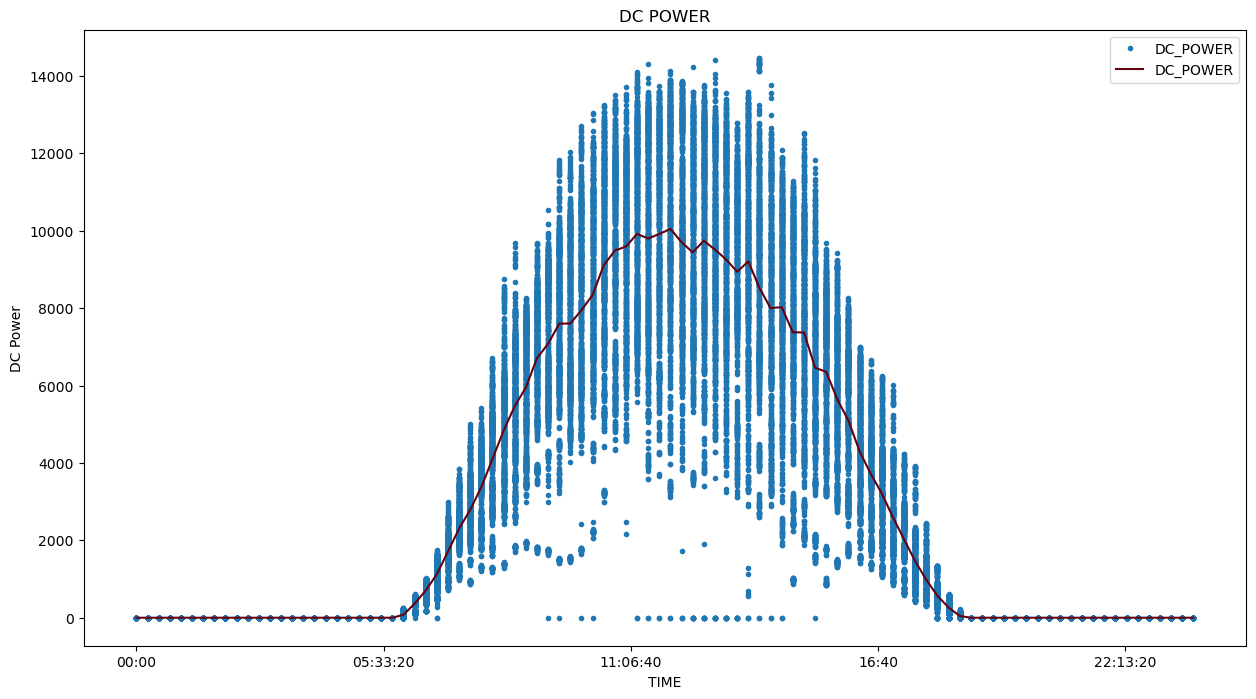

In [5]:
dfG1.plot(x= 'TIME', y='DC_POWER', style='.', figsize = (15, 8))
dfG1.groupby('TIME')['DC_POWER'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.ylabel('DC Power')
plt.title('DC POWER')
plt.show()

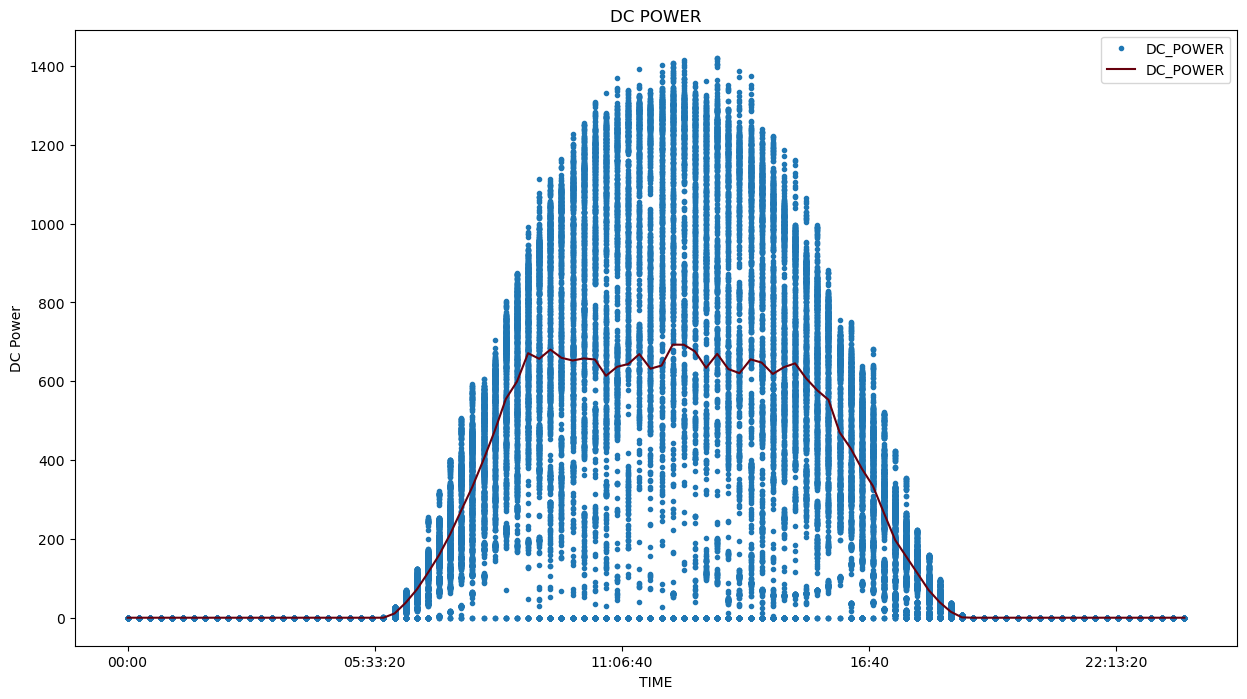

In [6]:
dfG2.plot(x= 'TIME', y='DC_POWER', style='.', figsize = (15, 8))
dfG2.groupby('TIME')['DC_POWER'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.ylabel('DC Power')
plt.title('DC POWER')
plt.show()

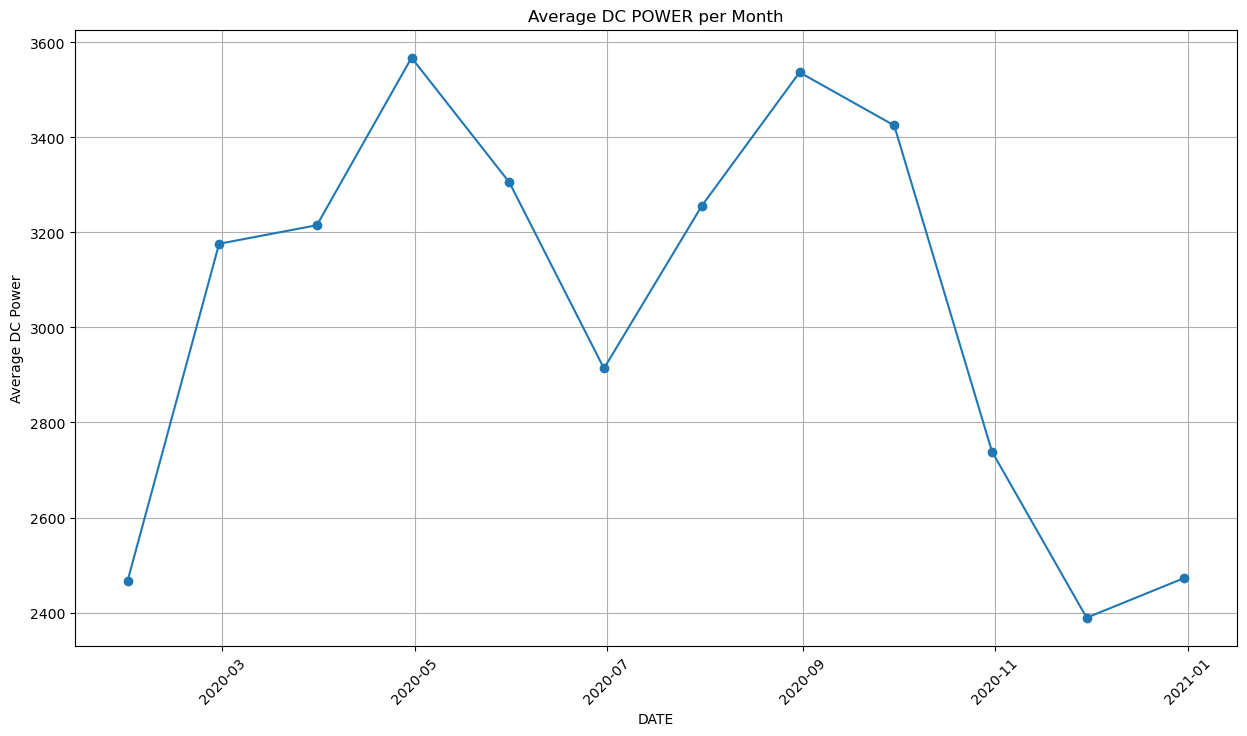

In [7]:
# Calculate the average DC POWER per month
average_dc_power_per_month = dfG1.resample('M', on='DATE')['DC_POWER'].mean()

# Create the 2D plot
plt.figure(figsize=(15, 8))
plt.plot(average_dc_power_per_month.index, average_dc_power_per_month.values, marker='o', linestyle='-')
plt.xlabel('DATE')
plt.ylabel('Average DC Power')
plt.title('Average DC POWER per Month')
plt.grid(True)

# Rotate the X-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


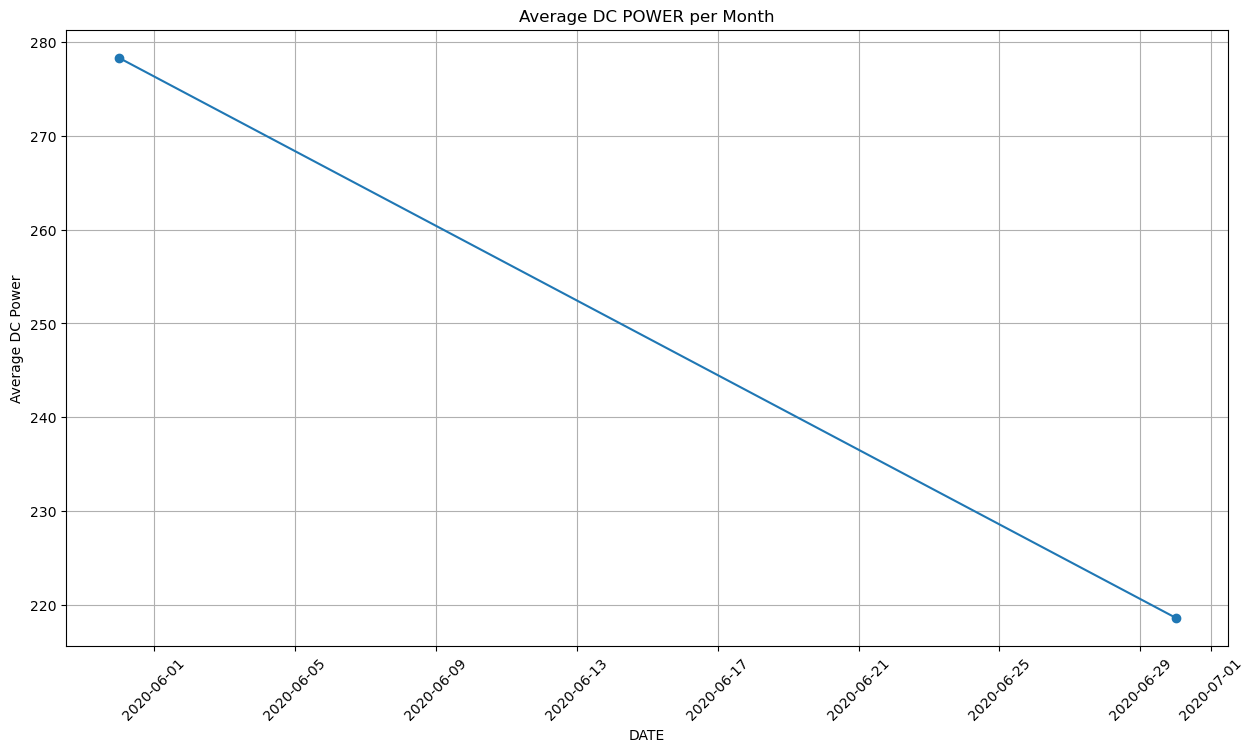

In [8]:
# Calculate the average DC POWER per month
average_dc_power_per_month2 = dfG2.resample('M', on='DATE')['DC_POWER'].mean()

# Create the 2D plot
plt.figure(figsize=(15, 8))
plt.plot(average_dc_power_per_month2.index, average_dc_power_per_month2.values, marker='o', linestyle='-')
plt.xlabel('DATE')
plt.ylabel('Average DC Power')
plt.title('Average DC POWER per Month')
plt.grid(True)

# Rotate the X-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

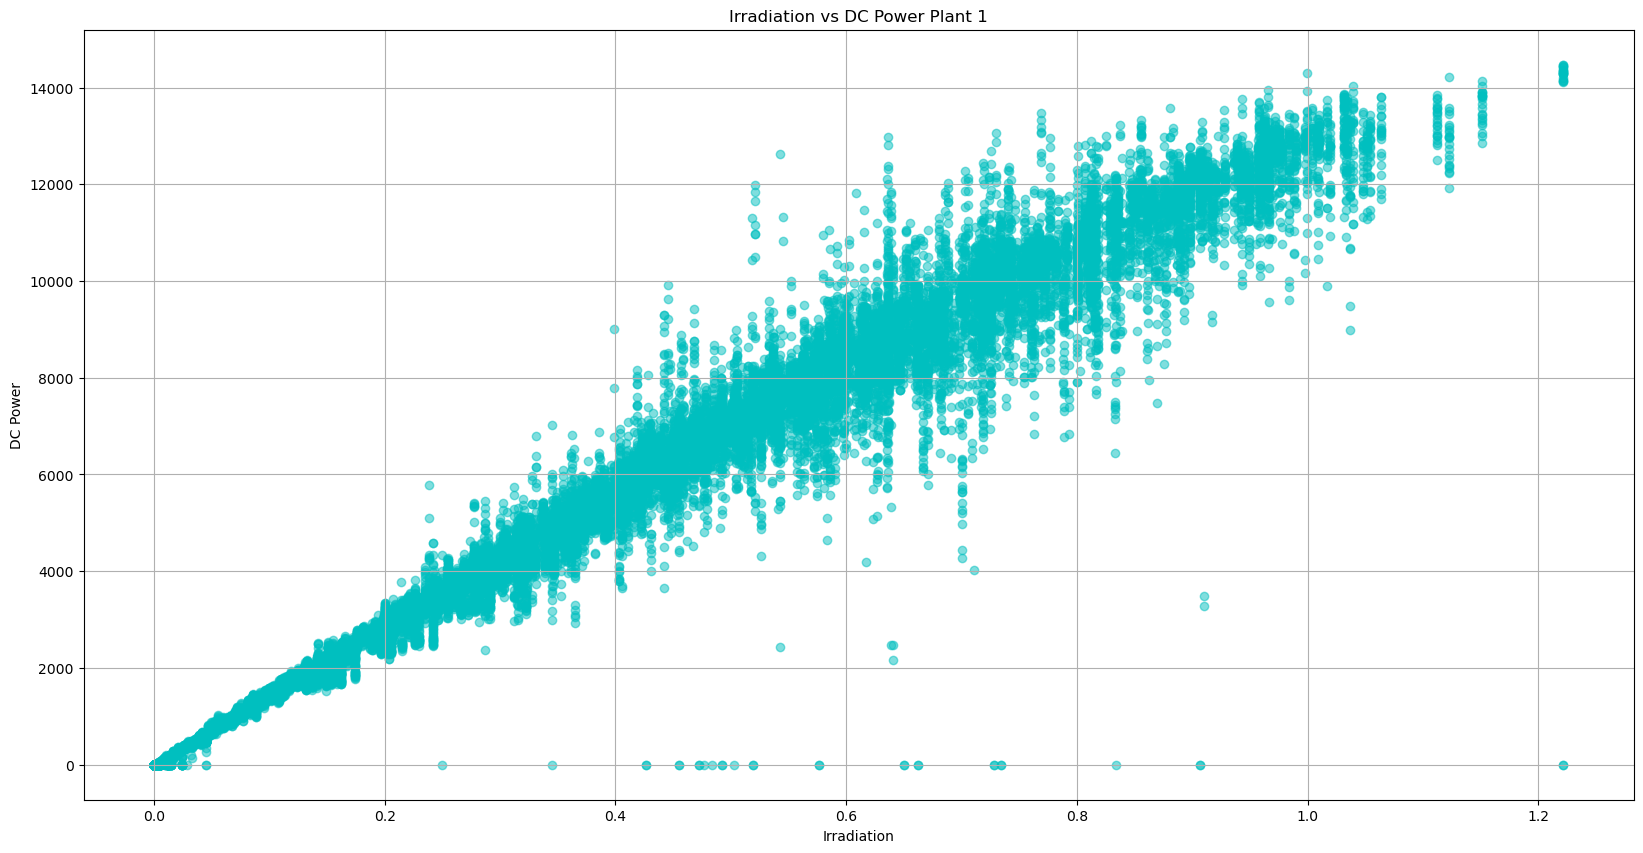

In [10]:
# Irradiation VS DC Power
# Plant 1

df_plant1 = pd.merge(dfG1, dfW1, on='DATE_TIME', how='left')
plt.figure(figsize=(20,10))
plt.title("Irradiation vs DC Power Plant 1")
plt.scatter(df_plant1['IRRADIATION'], df_plant1['DC_POWER'], c='c', alpha=0.5)
plt.xlabel("Irradiation")
plt.ylabel("DC Power")
plt.grid()
plt.show()

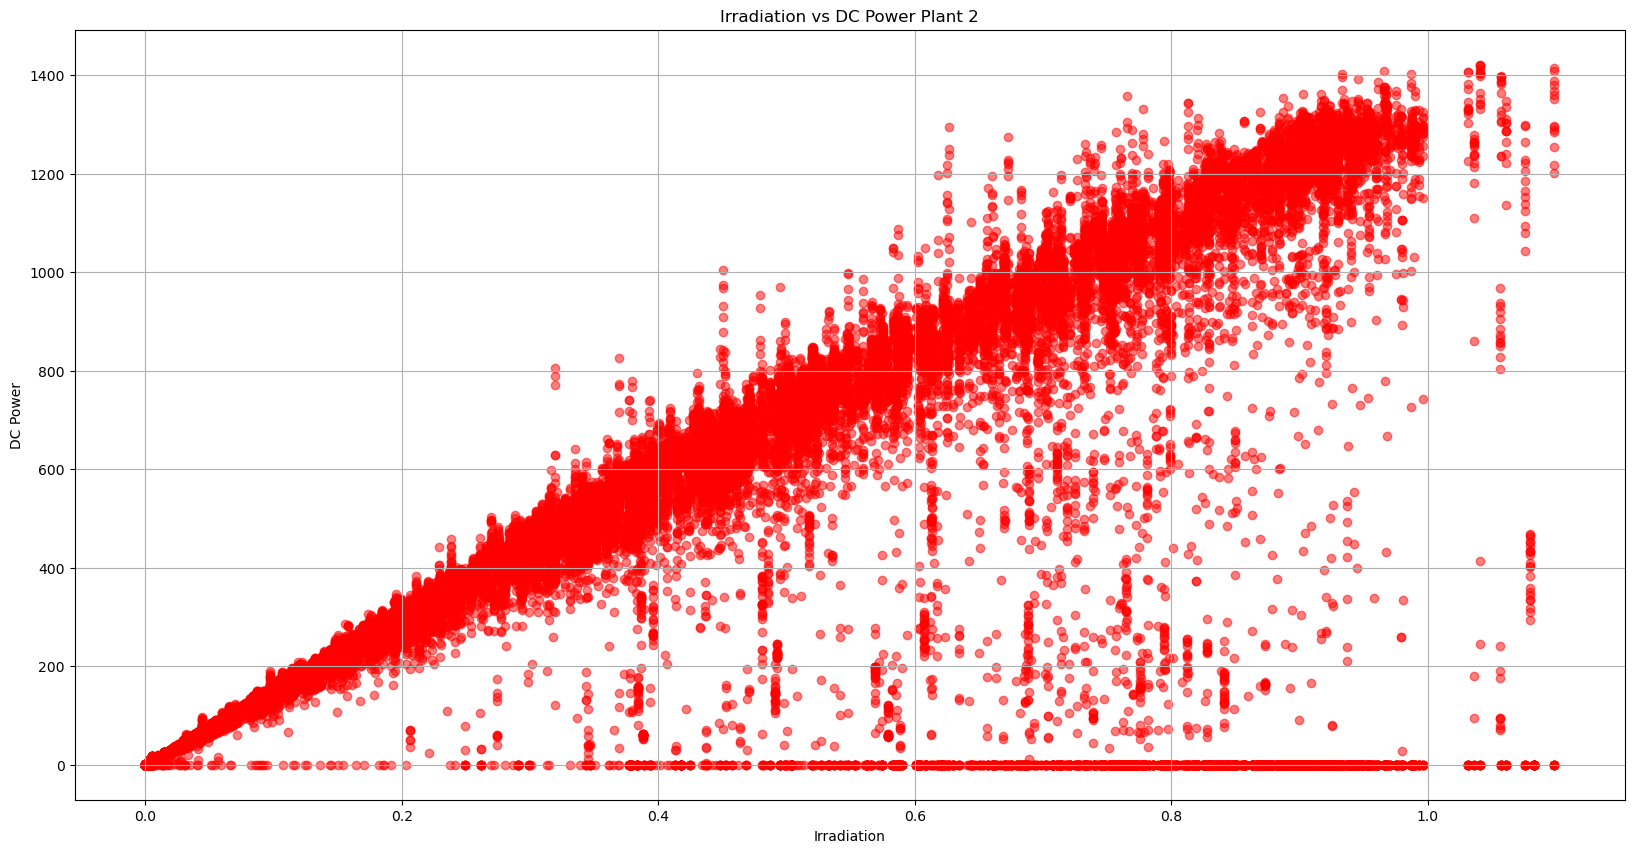

In [12]:
# Irradiation VS DC Power
# Plant 2

df_plant2 = pd.merge(dfG2, dfW2, on='DATE_TIME', how='left')
plt.figure(figsize=(20,10))
plt.title("Irradiation vs DC Power Plant 2")
plt.scatter(df_plant2['IRRADIATION'], df_plant2['DC_POWER'], c='red', alpha=0.5)
plt.xlabel("Irradiation")
plt.ylabel("DC Power")
plt.grid()
plt.show()

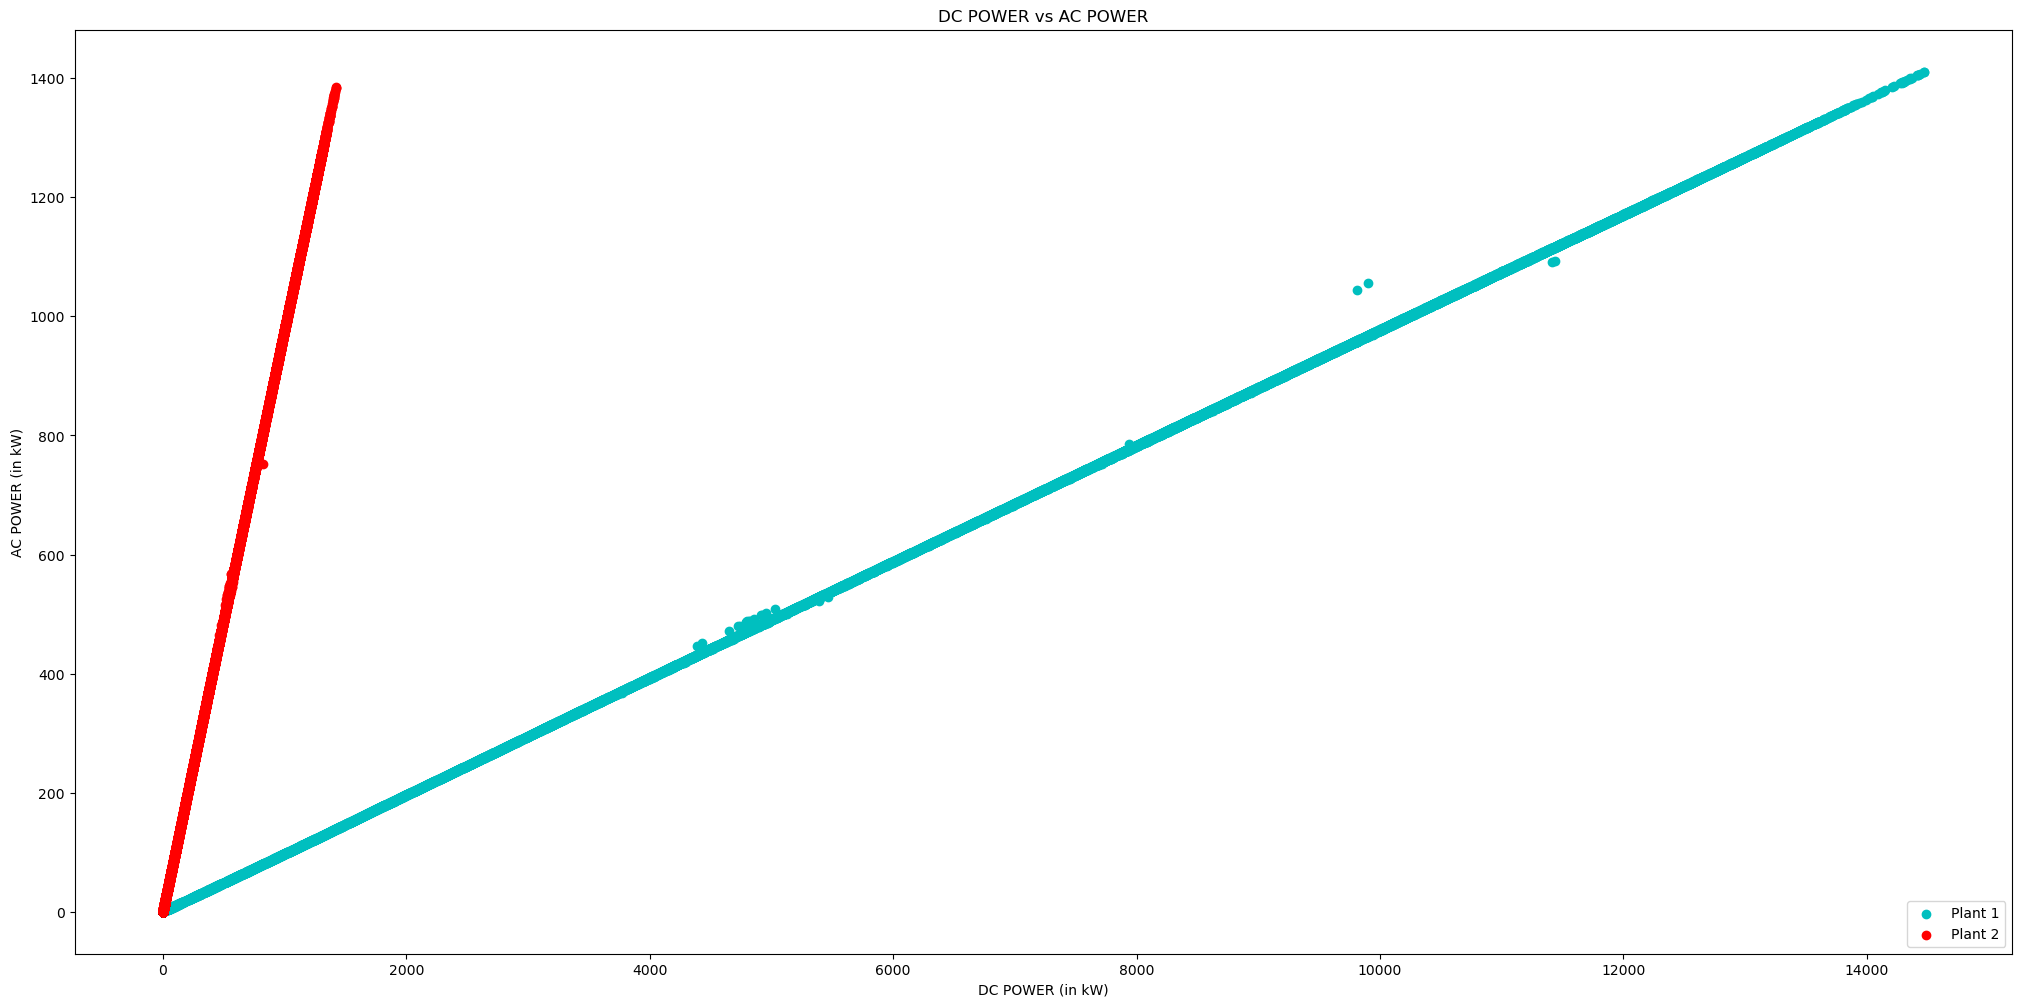

In [11]:
# The linear regression model 
DC_POW1 = dfG1.iloc[:,[3]].values
AC_POW1 = dfG1.iloc[:,[4]].values
DC_POW2 = dfG2.iloc[:,[3]].values
AC_POW2 = dfG2.iloc[:,[4]].values
plt.figure(figsize = (25, 12))
plt.scatter(DC_POW1, AC_POW1, color = 'c', label = 'Plant 1')
plt.scatter(DC_POW2, AC_POW2, color = 'red', label = 'Plant 2')
plt.legend(loc = 'lower right')
plt.xlabel('DC POWER (in kW)')
plt.ylabel('AC POWER (in kW)')
plt.title('DC POWER vs AC POWER')
plt.show()

